<a href="https://colab.research.google.com/github/kyoolbaba/notes/blob/main/DEEPLearningModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")

<ipython-input-15-3d96a11a198a>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


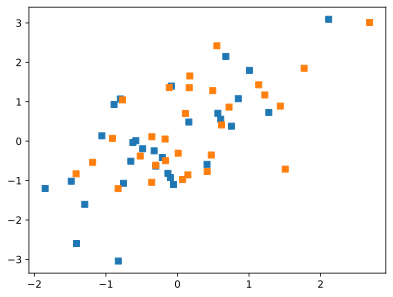

In [ ]:
N=30
x=torch.randn(N,2)
y=x+torch.randn(N,1)
plt.plot(x,y,"s")
plt.show()

In [ ]:
Ann_reg=nn.Sequential(
    nn.Linear(2,1),nn.ReLU(),nn.Linear(1,1)
)

In [ ]:
learning_rate=.05

lossfun=nn.MSELoss()
optimizer=torch.optim.SGD(Ann_reg.parameters(),lr=learning_rate)

In [ ]:
yHat=Ann_reg(x)

In [ ]:
loss=lossfun(yHat,y)
loss.detach()

In [ ]:
numepochs=5000
losses=torch.zeros(numepochs)

for epoch in range(numepochs):
  # forward propagation
  yHat=Ann_reg(x)

  # compute loss
  loss=lossfun(yHat,y)
  losses[epoch]=loss
  # back prop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([30, 2])) that is different to the input size (torch.Size([30, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


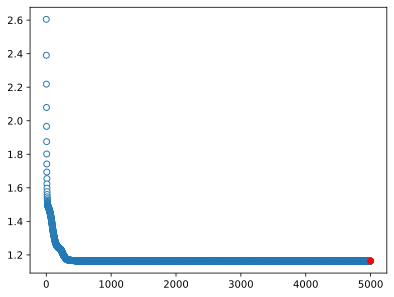

In [ ]:
predictions=Ann_reg(x)

testloss=(predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')

In [ ]:
testloss

tensor(1.5939, grad_fn=<MeanBackward0>)

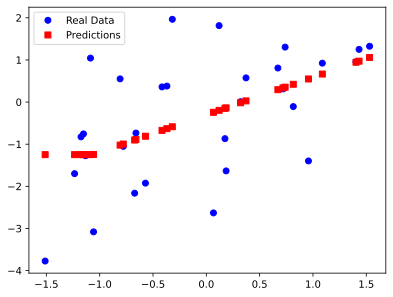

In [ ]:
plt.plot(x,y,'bo',label="Real Data")
plt.plot(x,predictions.detach(),'rs',label="Predictions")
# plt.title(f"prediction_data r={np.corrceof()}")
plt.legend()
plt.show()

In [ ]:
testloss.detach()

tensor(1.5939)

In [ ]:
testloss.item()

1.5939109325408936

# Manupulate Regression Slope and get insights of regression

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")

<ipython-input-1-24d2bd60fbc8>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


In [3]:
def buildModel(x,y):
  Annreg=nn.Sequential(
      nn.Linear(1,1),
      nn.ReLU(),
      nn.Linear(1,1)
  )
  lossfun=nn.MSELoss()
  optimizer=torch.optim.SGD(Annreg.parameters(),lr=.05)
  numepochs=500
  losses=torch.zeros(numepochs)
  for epochi in range(numepochs):
    yHat=Annreg(x)
    loss=lossfun(yHat,y)
    losses[epochi]=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions=Annreg(x)

  return predictions,losses

In [9]:
def create_dataset(m):
  N=50
  X=torch.randn(N,1);
  y=m*X-torch.randn(N,1)/2
  return X,y


In [10]:
x,y=create_dataset(.8)

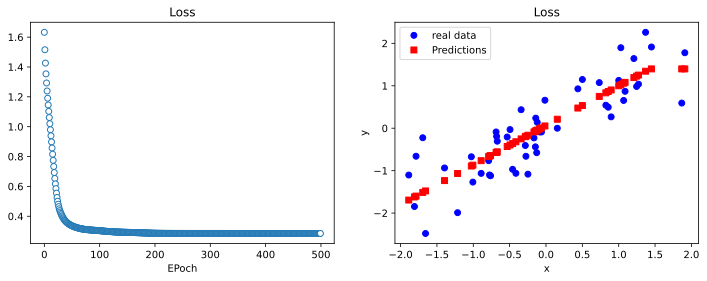

In [21]:
yhat,loss=buildModel(x,y)
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(loss.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel("EPoch")
ax[0].set_title("Loss")

ax[1].plot(x,y,'bo',label="real data")
ax[1].plot(x,yhat.detach(),'rs',label="Predictions")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("Loss")
ax[1].legend()

In [32]:
slopes=np.linspace(-2,2,21)
numExps=50
results=np.zeros((len(slopes),numExps,2))
for slopei in range(len(slopes)):
  for N in range(numExps):
    x,y=create_dataset(slopes[slopei])
    yhat,losses=buildModel(x,y)

    results[slopei,N,0]=losses[-1]
    results[slopei,N,1]=np.corrcoef(y.T,yhat.detach().T)[0,1]

  results[np.isnan(results)]=0

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Text(0.5, 1.0, 'Model Performance')

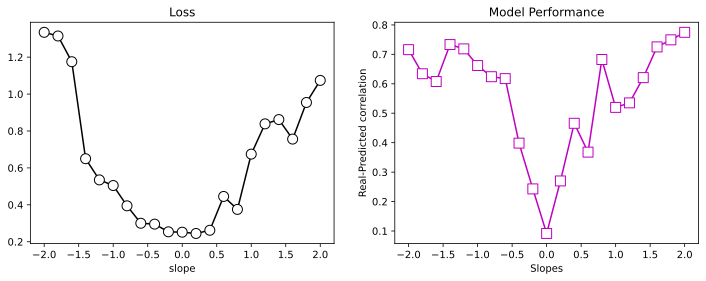

In [33]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel("slope")
ax[0].set_title("Loss")

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel("Slopes")
ax[1].set_ylabel("Real-Predicted correlation")
ax[1].set_title("Model Performance")